# Manejo de datos con Pandas

## 1. Resumen

Vamos a ver una pequeña introducción a la librería de manipulación y analisis de datos `Pandas`. Con ella podremos manejar y procesar datos tabulares que nos ayudará para poder operar con ellos y obtener información de una manera muy valiosa


<p align="center">
  <img src="https://github.com/DeepMaxFN/DeepMaxFN-blog/blob/master/images/pandas-icon.png?raw=true">
</p>

## 2. ¿Qué es Pandas?

Pandas es una librería de **Python** que está diseñada para que el trabajo con datos *relacionales* o *etiquetados* sea fácil e intuitivo

Pandas está diseñado para muchos tipos diferentes de datos:

*   Datos tabulares con columnas de tipos heterogéneos, como en una tabla SQL o una hoja de cálculo de Excel
*   Datos de series de tiempo ordenados y desordenados (no necesariamente de frecuencia fija).
*   Datos matriciales arbitrarios (homogéneos o heterogéneos) con etiquetas de fila y columna
*   Cualquier otra forma de conjuntos de datos observacionales/estadísticos. No es necesario etiquetar los datos en absoluto para colocarlos en una estructura de datos de pandas.

Las dos estructuras de datos principales de Pandas son las `Serie`s (unidimensional) y los `DataFrame`s (bidimensional). Pandas está construido sobre NumPy y está destinado a integrarse bien dentro de un entorno informático científico con muchas otras bibliotecas de terceros.

Para los científicos de datos, el trabajo con datos generalmente se divide en varias etapas: recopilar y limpiar datos, analizarlos/modelarlos y luego organizar los resultados del análisis en una forma adecuada para trazarlos o mostrarlos en forma de tabla. Pandas es la herramienta ideal para todas estas tareas.

Otra característica es que pandas es rápido, muchos de los algoritmos de bajo nivel se han construido en `C`

### 2.1. Pandas como `pd`

Generalmente a la hora de importar Pandas se suele importar con el alias de `pd`

In [1]:
import pandas as pd

print(pd.__version__)

1.1.5


## 3. Estructuras de datos de Pandas

En Pandas existen dos tipos de estructuras de datos: las `Serie`s y los `DataFrame`s

### 3.1. Series

El tipo de dato `Serie` es una matriz etiquetada unidimensional capaz de contener cualquier tipo de datos (enteros, cadenas, números de punto flotante, objetos Python, etc.). Están divididas en índices.

Para crear un tipo de dato `Serie` la forma más común es

``` python
serie = pd.Series(data, index=index)
```

Donde `data` puede ser
* Un diccionario
* Una lista o tupla
* Un ndarray de Numpy
* Un valor escalar

Como uno de los tipos de datos puede ser un ndarray de Numpy, importamos Numpy para poder usarlo

In [2]:
import numpy as np

#### 3.1.1. Series desde un diccionario

In [ ]:
diccionario = {"b": 1, "a": 0, "c": 2}

serie = pd.Series(diccionario)
serie

b    1
a    0
c    2
dtype: int64

Si se pasa un índice, se extraerán los valores de los datos correspondientes a las etiquetas del índice. Si no existen se crean como `NaN` (not a number)

In [ ]:
diccionario = {"b": 1, "a": 0, "c": 2}

serie = pd.Series(diccionario, index=["b", "c", "d", "a"])
serie

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

#### 3.1.2. Series desde una lista o tupla

Si los datos provienen de una lista o tupla y no se pasa ningún índice, se creará uno con valores [0, ..., len(data)-1]

In [ ]:
serie = pd.Series([1, 2, 3, 4])
serie

0    1
1    2
2    3
3    4
dtype: int64

Si se pasa un índice, este debe tener la misma longitud que los datos

In [ ]:
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
serie

a    1
b    2
c    3
d    4
dtype: int64

#### 3.1.3. Series desde un ndarray

Si los datos provienen de un ndarray y no se pasa ningún índice, se creará uno con valores `[0, ..., len(data)-1]`

In [ ]:
serie = pd.Series(np.random.randn(5))
serie

0   -1.530351
1    0.293836
2   -0.763430
3   -0.304678
4   -0.072303
dtype: float64

Si se pasa un índice, este debe tener la misma longitud que los datos

In [ ]:
serie = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
serie 

a    0.870907
b    1.395928
c   -1.160544
d    0.031081
e    1.311394
dtype: float64

#### 3.1.4. Series desde un escalar

Si se crea la serie desde un escalar, se creará con un único item

In [ ]:
serie = pd.Series(5.0)
serie

0    5.0
1    4.0
dtype: float64

Si se quieren crear más items en la serie, hay que pasarle el índice con el número de items que se quiere, de esta manera todos los items tendrán el valor del escalar

In [ ]:
serie = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
serie

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

#### 3.1.5. Operaciones con Series

Al igual que con Numpy, podemos realizar operaciones con todos los elementos de una serie, sin tener que hacer una iteracción por cada uno de ellos

In [ ]:
serie = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
print(f"serie:\n{serie}")

print(f"\nserie + serie =\n{serie + serie}")

serie:
a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

serie + serie =
a    10.0
b    10.0
c    10.0
d    10.0
e    10.0
dtype: float64


In [ ]:
serie = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
print(f"serie:\n{serie}")

print(f"\nexp(serie) =\n{np.exp(serie)}")

serie:
a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

exp(serie) =
a    148.413159
b    148.413159
c    148.413159
d    148.413159
e    148.413159
dtype: float64


Una diferencia entre `Serie`s y ndarrays es que las operaciones entre `Serie`s alinean automáticamente los datos según sus etiquetas. Por lo tanto, se pueden escribir cálculos sin tener en cuenta si las `Serie`s involucradas tienen las mismas etiquetas. Si no se encuentra una etiqueta en una `Serie` u otra, el resultado se marcará como faltante (NaN).

In [ ]:
serie = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
print(f"serie:\n{serie}")

print(f"\nserie[1:] + serie[:-1] =\n{serie[1:] + serie[:-1]}")

serie:
a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

serie[1:] + serie[:-1] =
a     NaN
b    10.0
c    10.0
d    10.0
e     NaN
dtype: float64


#### 3.1.6. Atributo nombre de las series

Uno de los atributos de las `Serie`s es `name`, el cual corresponde al nombre que tendrán cuando se añadan a un DataFrame. Por el camino contrario, cuando se obtiene una serie de un DataFrame, esta serie tendrá como nombre el que tenía en el DataFrame

In [ ]:
serie = pd.Series(np.random.randn(5), name="aleatorio")
serie

0   -1.230289
1    0.716663
2    0.009893
3   -0.369320
4    1.230639
Name: aleatorio, dtype: float64

Se puede cambiar el nombre de una serie mediante el méteodo `rename()`

In [ ]:
serie = serie.rename("random")
serie

0   -1.230289
1    0.716663
2    0.009893
3   -0.369320
4    1.230639
Name: random, dtype: float64

### 3.2. DataFrames

Un `DataFrame` es una estructura de datos etiquetada y bidimensional, con columnas de tipos potencialmente diferentes, es decir, en una columna puede haber datos de tipo entero, en otra columna datos de tipo string, etc. Puede pensar en ello como una hoja de cálculo o una tabla SQL, o un diccionario de objetos `Serie`s. 

Es el objeto pandas más utilizado. Al igual que las `Serie`s, los `DataFrame`s aceptan muchos tipos diferentes de entrada:

Junto con los datos, opcionalmente puede pasar argumentos de índice (etiquetas de fila) y columnas (etiquetas de columna). Si pasa un índice y/o columnas, está garantizando el índice y/o columnas del `DataFrame` resultante. Por lo tanto, un diccionario de `Serie`s más un índice específico descartará todos los datos que no coincidan con el índice pasado

Si no se pasan las etiquetas de los ejes, se construirán a partir de los datos de entrada basándose en reglas de sentido común.

#### 3.2.1. DataFrames desde un diccionario de Series

Si se pasa un diccionario con `Serie`s se creará el `DataFrame` con tantas columnas como `Serie`s tenga el diccionario

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0]),
    "dos": pd.Series([4.0, 5.0, 6.0, 7.0])
    }

dataframe = pd.DataFrame(diccionario)
dataframe

,uno,dos
0,1.0,4.0
1,2.0,5.0
2,3.0,6.0
3,NaN,7.0


Si cada una de las `Serie`s tiene índices definidos, el `DataFrame` resultante será la unión de estos índices

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "dos": pd.Series([4.0, 5.0, 6.0, 7.0], index=["a", "b", "c", "d"])
    }

dataframe = pd.DataFrame(diccionario)
dataframe

,uno,dos
a,1.0,4.0
b,2.0,5.0
c,3.0,6.0
d,NaN,7.0


In [ ]:
dataframe = pd.DataFrame(diccionario, index=["d", "b", "a"])
dataframe

,uno,dos
d,NaN,7.0
b,2.0,5.0
a,1.0,4.0


Si se le pasa las columnas aparecerán en el orden pasado

In [ ]:
dataframe = pd.DataFrame(diccionario, columns=["dos", "tres"])
dataframe

,dos,tres
a,4.0,NaN
b,5.0,NaN
c,6.0,NaN
d,7.0,NaN


#### 3.2.2. DataFrames desde un diccionario de ndarrays o listas

Todos los ndarrays o listas deben tener la misma longitud. Si se pasa un índice, también debe tener la misma longitud que los ndarrays o listas

In [ ]:
diccionario = {
    "uno": [1.0, 2.0, 3.0, 4.0],
    "dos": [4.0, 3.0, 2.0, 1.0]
    }

dataframe = pd.DataFrame(diccionario)
dataframe

,uno,dos
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


#### 3.2.3. DataFrames desde una matriz

Si se pasa un índice tiene que tener la misma longitud que el número de filas de la matriz y si se pasan las columnas tienen que tener la misma longitud que las columnas de la matriz

In [ ]:
matriz = np.array([[1, 3], [2, 2], [3, 1]])

dataframe = pd.DataFrame(matriz, index=["a", "b", "c"], columns=["columna1", "columna2"])
dataframe

,columna1,columna2
a,1,3
b,2,2
c,3,1


#### 3.2.4. DataFrames desde una lista de diccionarios

In [ ]:
lista = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

dataframe = pd.DataFrame(lista)
dataframe

,a,b,c
0,1,2,NaN
1,5,10,20.0


#### 3.2.5. DataFrames desde un diccionario de tuplas

In [ ]:
diccionario = {
    ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
    ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
    ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
    ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
    ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }

dataframe = pd.DataFrame(diccionario)
dataframe

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### 3.2.6. DataFrames desde una Serie

El resultado será un `DataFrame` con el mismo índice que la Serie de entrada, y con una columna cuyo nombre es el nombre original de la Serie (solo si no se proporciona otro nombre de columna).

In [ ]:
diccionario = {"b": 1, "a": 0, "c": 2}

serie = pd.Series(diccionario)

dataframe = pd.DataFrame(serie)
dataframe

,0
b,1
a,0
c,2


## 4. Exploración de un DataFrame

Cuando un `DataFrame` es muy grande no se puede representar entero

In [ ]:
california_housing_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
california_housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Por lo que es muy útil tener métodos para explorarlo y obtener información de manera rápida

### 4.1. Cabeza del DataFrame

Para ver las primeras filas y hacerse una ídea de cómo es el `DataFrame` existe el metodo `head()`, que por defecto muestra las primeras 5 filas del `DataFrame`. Si se quiere ver un número distinto de filas introducirlo mediante el atributo `n`

In [ ]:
california_housing_train.head(n=10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


### 4.2. Cola del DataFrame

Si lo que se quiere es ver las últimas filas se puede usar el método `tail()`, mediante el atributo `n` se elige cuantas filas mostrar

In [ ]:
california_housing_train.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


### 4.3. Información del DataFrame

Otro método muy util es `info()` que nos da información del `DataFrame`

In [ ]:
california_housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


### 4.4. Filas y columnas DataFrame

Se pueden obtener los índices y las columnas de un `DataFrame` mediante los métodos `index` y `columns`

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "dos": pd.Series([4.0, 5.0, 6.0, 7.0], index=["a", "b", "c", "d"])
    }

dataframe = pd.DataFrame(diccionario)

indices = dataframe.index
columnas = dataframe.columns
print(f"El DataFrame tiene los índices\n\t{indices}\n")
print(f"El DataFrame tiene las columnas\n\t{columnas}")

El DataFrame tiene los índices
	Index(['a', 'b', 'c', 'd'], dtype='object')

El DataFrame tiene las columnas
	Index(['uno', 'dos'], dtype='object')


### 4.5. Descripción del DataFrame

El método `describe()` muestra un resumen estadístico rápido de los datos del `DataFrame`

In [ ]:
california_housing_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
california_housing_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 4.6. Ordenación del `DataFrame`

Se pueden ordenar alfabéticamente las filas de un `DataFrame` mediante el método `sort_index()`

In [ ]:
california_housing_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
california_housing_train.sort_index().head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Como en este caso las filas ya estaban ordenadas establecemos `ascending=False` para que el orden sea al revés

In [ ]:
california_housing_train.sort_index(ascending=False).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0


Si lo que se quiere son ordenar las columnas hay que introducir `index=1` ya que por defecto es `0`

In [ ]:
california_housing_train.sort_index(axis=1).head()

,households,housing_median_age,latitude,longitude,median_house_value,median_income,population,total_bedrooms,total_rooms
0,472.0,15.0,34.19,-114.31,66900.0,1.4936,1015.0,1283.0,5612.0
1,463.0,19.0,34.40,-114.47,80100.0,1.8200,1129.0,1901.0,7650.0
2,117.0,17.0,33.69,-114.56,85700.0,1.6509,333.0,174.0,720.0
3,226.0,14.0,33.64,-114.57,73400.0,3.1917,515.0,337.0,1501.0
4,262.0,20.0,33.57,-114.57,65500.0,1.9250,624.0,326.0,1454.0


Si lo que queremos es ordenar el `DataFrame` a través de una columna determinada tenemos que usar el método `sort_values()` e indicarle la etiqueta de la columna sobre la que se quiere ordenar

In [ ]:
california_housing_train.sort_values('median_house_value')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
568,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0
16643,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0
16801,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0
3226,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0
7182,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0
...,...,...,...,...,...,...,...,...,...
15834,-122.42,37.81,52.0,1314.0,317.0,473.0,250.0,4.3472,500001.0
7927,-118.40,33.87,38.0,2398.0,431.0,911.0,392.0,5.2319,500001.0
3546,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,500001.0
7924,-118.40,33.88,35.0,1060.0,191.0,444.0,196.0,8.0015,500001.0


### 4.7. Estadísticas del DataFrame

Se pueden obtener estadísticas del `DataFrame`, como la media, la moda, la desviación estandar

In [ ]:
california_housing_train = pd.read_csv("/content/sample_data/california_housing_train.csv")

print(f"media:\n{california_housing_train.mean()}")
print(f"\n\ndesviación estandar:\n{california_housing_train.std()}")

media:
longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64


desviación estandar:
longitude                  2.005166
latitude                   2.137340
housing_median_age        12.586937
total_rooms             2179.947071
total_bedrooms           421.499452
population              1147.852959
households               384.520841
median_income              1.908157
median_house_value    115983.764387
dtype: float64


Si se quieren obtener las estadísticas sobre las filas y no sobre las comlumnas hay que indicarlo mediante `axis=1`

In [ ]:
california_housing_train = pd.read_csv("/content/sample_data/california_housing_train.csv")

print(f"media:\n{california_housing_train.mean(axis=1)}")
print(f"\n\ndesviación estandar:\n{california_housing_train.std(axis=1)}")

media:
0         8357.597067
1        10131.527778
2         9664.642322
3         8435.029078
4         7567.436111
             ...     
16995    12806.408567
16996     9276.770878
16997    12049.507922
16998    10082.053300
16999    10863.022744
Length: 17000, dtype: float64


desviación estandar:
0        22026.612445
1        26352.939272
2        28514.316588
3        24366.754747
4        21730.014569
             ...     
16995    36979.676899
16996    26158.006771
16997    34342.876792
16998    28408.152329
16999    31407.119788
Length: 17000, dtype: float64


Otra cosa útil que se puede obtener de los `DataFrame`s es por ejemplo el número de veces que se repite cada item de una columna

In [ ]:
california_housing_train["total_rooms"].value_counts()

1582.0     16
1527.0     15
1717.0     14
1471.0     14
1703.0     14
           ..
157.0       1
2760.0      1
458.0       1
10239.0     1
4068.0      1
Name: total_rooms, Length: 5533, dtype: int64

Por ejemplo podemos ver que hay un total de 16 casas con 1582 habitaciones!

## 5. Adición de columnas

Se pueden añadir columnas facilmente como operaciones de otras columnas

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0]),
    "dos": pd.Series([4.0, 5.0, 6.0, 7.0])
    }

dataframe = pd.DataFrame(diccionario)

dataframe["tres"] = dataframe["uno"] + dataframe["dos"]
dataframe["flag"] = dataframe["tres"] > 7.0

dataframe

,uno,dos,tres,flag
0,1.0,4.0,5.0,False
1,2.0,5.0,7.0,False
2,3.0,6.0,9.0,True
3,NaN,7.0,NaN,False


También se pueden añadir columnas indicando qué valor tendrán todos sus items

In [ ]:
dataframe["constante"] = 8.0
dataframe

,uno,dos,tres,flag,constante
0,1.0,4.0,5.0,False,8.0
1,2.0,5.0,7.0,False,8.0
2,3.0,6.0,9.0,True,8.0
3,NaN,7.0,NaN,False,8.0


Si se añade una `Serie` que no tiene el mismo número de índices que el `DataFrame`, esta se ajustará al número de índices del `DatFrame`

In [ ]:
dataframe["Menos indices"] = dataframe["uno"][:2]
dataframe

,uno,dos,tres,flag,constante,Menos indices
0,1.0,4.0,5.0,False,8.0,1.0
1,2.0,5.0,7.0,False,8.0,2.0
2,3.0,6.0,9.0,True,8.0,NaN
3,NaN,7.0,NaN,False,8.0,NaN


Con los métodos anteriores la columna se añadía al final, pero si se quiere añadir la columna en una posición determinda se puede usar el método `insert()`.

Por ejemplo, si se quiere añadir una columna en la posición 3 (teniendo en cuenta que se empieza a contar desde la posición 0), que el nombre de la columna sea *columna insertada* y que su valor sea el doble que el de la columna *tres* se haría de la siguiente manera

In [ ]:
dataframe.insert(loc=3, column="columna insertada", value=dataframe["tres"]*2)
dataframe

,uno,dos,tres,columna insertada,flag,constante,Menos indices
0,1.0,4.0,5.0,10.0,False,8.0,1.0
1,2.0,5.0,7.0,14.0,False,8.0,2.0
2,3.0,6.0,9.0,18.0,True,8.0,NaN
3,NaN,7.0,NaN,NaN,False,8.0,NaN


Si se quiere añadir más de una columna por comando se puede usar el método `assign()`

In [ ]:
dataframe = dataframe.assign(
    columna_asignada1 = dataframe["uno"] * dataframe["tres"],
    columna_asignada2 = dataframe["dos"] * dataframe["tres"],
    )
dataframe

,uno,dos,tres,columna insertada,flag,constante,Menos indices,columna_asignada1,columna_asignada2
0,1.0,4.0,5.0,10.0,False,8.0,1.0,5.0,20.0
1,2.0,5.0,7.0,14.0,False,8.0,2.0,14.0,35.0
2,3.0,6.0,9.0,18.0,True,8.0,NaN,27.0,54.0
3,NaN,7.0,NaN,NaN,False,8.0,NaN,NaN,NaN


## 6. Eliminación de columnas

Se puede eliminar una columna determinada mediante el método `pop()`

In [ ]:
dataframe.pop("constante")
dataframe

,uno,dos,tres,columna insertada,flag,Menos indices,columna_asignada1,columna_asignada2
0,1.0,4.0,5.0,10.0,False,1.0,5.0,20.0
1,2.0,5.0,7.0,14.0,False,2.0,14.0,35.0
2,3.0,6.0,9.0,18.0,True,NaN,27.0,54.0
3,NaN,7.0,NaN,NaN,False,NaN,NaN,NaN


O mediante `del`

In [ ]:
del dataframe["flag"]
dataframe

,uno,dos,tres,columna insertada,Menos indices,columna_asignada1,columna_asignada2
0,1.0,4.0,5.0,10.0,1.0,5.0,20.0
1,2.0,5.0,7.0,14.0,2.0,14.0,35.0
2,3.0,6.0,9.0,18.0,NaN,27.0,54.0
3,NaN,7.0,NaN,NaN,NaN,NaN,NaN


## 7. Operaciones sobre DataFrames

Se pueden realizar operaciones sobre los `DataFrame`s al igual que se podía hacer con Numpy

In [ ]:
dataframe[ ["uno", "dos", "tres"] ] * 2

,uno,dos,tres
0,2.0,8.0,10.0
1,4.0,10.0,14.0
2,6.0,12.0,18.0
3,NaN,14.0,NaN


In [ ]:
np.exp(dataframe[ ["uno", "dos", "tres"] ])

,uno,dos,tres
0,2.718282,54.598150,148.413159
1,7.389056,148.413159,1096.633158
2,20.085537,403.428793,8103.083928
3,NaN,1096.633158,NaN


Si se quiere realizar operaciones más complejas se puede utilizar el método `apply()`

In [ ]:
dataframe = dataframe.apply(lambda x: x.max() - x.min())
dataframe

uno                   2.0
dos                   3.0
tres                  4.0
columna insertada     8.0
Menos indices         1.0
columna_asignada1    22.0
columna_asignada2    34.0
dtype: float64

## 8. Transpuesta

Se puede hacer la transpuesta de un `DataFrame` mediante el método `T`

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0], index=["fila a", "fila b", "fila c"]),
    "dos": pd.Series([4.0, 5.0, 6.0], index=["fila a", "fila b", "fila c"])
    }

dataframe = pd.DataFrame(diccionario)

dataframe["tres"] = dataframe["uno"] + dataframe["dos"]
dataframe["flag"] = dataframe["tres"] > 7.0

dataframe.T

,fila a,fila b,fila c
uno,1,2,3
dos,4,5,6
tres,5,7,9
flag,False,False,True


## 9. Conversión a Numpy

Si se quiere convertir una `Serie` o `DataFrame` a Numpy se puede usar el método `to_numpy()` o usar la función `np.asarray()`

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0], index=["fila a", "fila b", "fila c"]),
    "dos": pd.Series([4.0, 5.0, 6.0], index=["fila a", "fila b", "fila c"])
    }

dataframe = pd.DataFrame(diccionario)

dataframe["tres"] = dataframe["uno"] + dataframe["dos"]
dataframe["flag"] = dataframe["tres"] > 7.0

dataframe

,uno,dos,tres,flag
fila a,1.0,4.0,5.0,False
fila b,2.0,5.0,7.0,False
fila c,3.0,6.0,9.0,True


In [ ]:
matriz_np = dataframe.to_numpy()
matriz_np

array([[1.0, 4.0, 5.0, False],
       [2.0, 5.0, 7.0, False],
       [3.0, 6.0, 9.0, True]], dtype=object)

In [ ]:
matriz_np = np.asarray(dataframe)
matriz_np

array([[1.0, 4.0, 5.0, False],
       [2.0, 5.0, 7.0, False],
       [3.0, 6.0, 9.0, True]], dtype=object)

Este ejemplo no es el más indicado, ya que mezcla números con booleanos, y como ya explicamos en el anterior posst [Cálculo matricial con Numpy](https://deepmaxfn.github.io/DeepMaxFN-blog/deepmaxfn/python/numpy/2021/04/23/Calculo-matricial-con-Numpy.html#2.-¿Qué-es-Numpy?), todos los elementos de un `ndarray` tienen que ser del mismo tipo.

En este caso estamos mezclando números con booleanos, por lo que para solucionarlo Numpy los convierte todos a objetos

Para solucionar esto nos quedamos solo con los números y los convertimos a un `ndarray`

In [ ]:
matriz_np = dataframe[ ["uno", "dos", "tres"] ].to_numpy()
matriz_np, matriz_np.dtype

(array([[1., 4., 5.],
        [2., 5., 7.],
        [3., 6., 9.]]), dtype('float64'))

Ahora se puede ver que se ha creado un `ndarray` donde todos los datos son de tipo `float`

## 10. Lectura de datos de fuentes externas

Una de las mayores fortalezas de Pandas es poder leer datos de archivos, por lo que no es necesario crearse un `DataFrame` con los datos que se quieren procesar, sino que se pueden leer de un archivo

De la misma manera que se pueden crear `DataFrame`s de archivos externos, también se pueden guardar `DataFrame`s en archivos, para así crearte tu propio set de datos, configurarlo de la manera que quieras y guardarlo en un archivo para poder usarlo más adelante

En la siguiente tabla se muestran las funciones para leer y escribir archivos de distintos formatos

|Fromato|Tipo de archivo|Función de lectura|Función de escritura|
|---|---|---|---|
|texto|CSV|[read_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)|[to_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)|
|texto|Fixed-Width Text File|[read_fwf](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-fwf-reader)||
|texto|JSON|[read_json](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-json-reader)|[to_json](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-json-writer)|
|texto|HTML|[read_html](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-html)|[to_html](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-html)|
|texto|Local clipboard|[read_clipboard](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-clipboard)|[to_clipboard](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-clipboard)|
|binary|MS Excel|[read_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader)|[to_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-writer)|
|binary|OpenDocument|[read_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-ods)|
|binary|HDF5 Format|[read_hdf](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)|[to_hdf](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)|
|binary|Feather Format|[read_feather](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-feather)|[to_feather](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-feather)|
|binary|Parquet Format|[read_parquet](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-parquet)|[to_parquet](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-parquet)|
|binary|ORC Format|[read_orc](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-orc)|
|binary|Msgpack|[read_msgpack](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-msgpack)|[to_msgpack](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-msgpack)|
|binary|Stata|[read_stata](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-stata-reader)|[to_stata](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-stata-writer)|
|binary|SAS|[read_sas](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sas-reader)|
|binary|SPSS|[read_spss](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-spss-reader)|
|binary|Python Pickle Format|[read_pickle](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-pickle)|[to_pickle](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-pickle)|
|SQL|SQL|[read_sql](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sql)|[to_sql](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sql)|
|SQL|Google BigQuery|[read_gbq](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-bigquery)|[to_gbq](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-bigquery)|

## 11. Indexación en DataFrames

Hay muchas maneras de indexar en los `DatFrame`s,

In [ ]:
fechas = pd.date_range('1/1/2000', periods=8)
dataframe = pd.DataFrame(np.random.randn(8, 4), index=fechas, columns=['A', 'B', 'C', 'D'])

dataframe

,A,B,C,D
2000-01-01,-0.341962,0.639913,0.765817,0.056692
2000-01-02,0.507258,-0.942036,-0.003828,0.782191
2000-01-03,-1.463557,1.041023,-1.321715,2.822735
2000-01-04,1.781058,-1.849352,-0.620466,-0.497001
2000-01-05,0.318897,-0.229218,-1.095593,-0.186248
2000-01-06,0.362064,-0.193479,-0.779446,-0.685112
2000-01-07,-0.084632,-0.112474,-0.108556,1.031709
2000-01-08,0.739424,0.253191,0.196287,-0.242741


### 11.1. Indexación por de columnas

Para seleccionar columnas dentro de un `DataFrame` lo podemos hacer seleccionando la columna entre corchetes `[]`, o indicando la columna como si fuese un método del `DataFrame`

In [ ]:
dataframe['A']

2000-01-01    0.813153
2000-01-02   -0.244584
2000-01-03    0.125729
2000-01-04    0.352275
2000-01-05   -2.050976
2000-01-06   -0.312296
2000-01-07    0.897837
2000-01-08    0.271403
Freq: D, Name: A, dtype: float64

In [ ]:
dataframe.A

2000-01-01    0.813153
2000-01-02   -0.244584
2000-01-03    0.125729
2000-01-04    0.352275
2000-01-05   -2.050976
2000-01-06   -0.312296
2000-01-07    0.897837
2000-01-08    0.271403
Freq: D, Name: A, dtype: float64

Si se quiere unas filas determinadas se pasan mediante una lista

In [ ]:
dataframe[ ['A', 'B'] ]

,A,B
2000-01-01,-0.341962,0.639913
2000-01-02,0.507258,-0.942036
2000-01-03,-1.463557,1.041023
2000-01-04,1.781058,-1.849352
2000-01-05,0.318897,-0.229218
2000-01-06,0.362064,-0.193479
2000-01-07,-0.084632,-0.112474
2000-01-08,0.739424,0.253191


### 11.2. Indexación de filas por posiciones

Se puede seleccionar un rango de filas de un `DataFrame` de la siguiente manera

In [ ]:
dataframe[0:3]

,A,B,C,D
2000-01-01,0.813153,-0.869356,0.934293,0.338644
2000-01-02,-0.244584,0.536352,0.322248,0.238903
2000-01-03,0.125729,2.046910,-0.877466,-0.710034


Si solo se quiere seleccionar una sola fila, hay que indicar un rago de filas que incluya solo a esa, si por ejemplo se quiere seleccionar la fila numero 1

In [ ]:
dataframe[1:2]

,A,B,C,D
2000-01-02,-0.244584,0.536352,0.322248,0.238903


Otro método para seleccionar una fila por su posicione es el método `iloc[]`

In [ ]:
dataframe.iloc[0:3]

,A,B,C,D
2000-01-01,0.813153,-0.869356,0.934293,0.338644
2000-01-02,-0.244584,0.536352,0.322248,0.238903
2000-01-03,0.125729,2.046910,-0.877466,-0.710034


Si se quieren unas filas determinadas se pasa una lista con sus posiciones

In [ ]:
dataframe.iloc[ [0, 2, 4] ]

,A,B,C,D
2000-01-01,-0.341962,0.639913,0.765817,0.056692
2000-01-03,-1.463557,1.041023,-1.321715,2.822735
2000-01-05,0.318897,-0.229218,-1.095593,-0.186248


### 11.3. Indexación de filas por etiquetas

Para seleccionar una fila por sus etiquetas podemos usar el método `loc[]`

In [ ]:
dataframe.loc['2000-01-01']

A    0.813153
B   -0.869356
C    0.934293
D    0.338644
Name: 2000-01-01 00:00:00, dtype: float64

Si se quiere seleccionar un rango de filas podemos indexarlas mediante los dos puntos `:`

In [ ]:
dataframe.loc['2000-01-01':'2000-01-03']

,A,B,C,D
2000-01-01,0.813153,-0.869356,0.934293,0.338644
2000-01-02,-0.244584,0.536352,0.322248,0.238903
2000-01-03,0.125729,2.046910,-0.877466,-0.710034


Si se quiere unas filas determinadas se pasan mediante una lista

In [ ]:
dataframe.loc[ ['2000-01-01', '2000-01-03', '2000-01-05'] ]

,A,B,C,D
2000-01-01,-0.341962,0.639913,0.765817,0.056692
2000-01-03,-1.463557,1.041023,-1.321715,2.822735
2000-01-05,0.318897,-0.229218,-1.095593,-0.186248


### 11.4. Selección de una porción del DataFrame mediante posiciones

In [ ]:
dataframe.iloc[0:3, 0:2]

,A,B
2000-01-01,0.813153,-0.869356
2000-01-02,-0.244584,0.536352
2000-01-03,0.125729,2.046910


Si se quieren unas filas y columnas determinadas se pasan listas con las posiciones deseadas

In [ ]:
dataframe.iloc[ [0, 2, 4], [0, 2] ]

,A,C
2000-01-01,-0.341962,0.765817
2000-01-03,-1.463557,-1.321715
2000-01-05,0.318897,-1.095593


### 11.5. Selección de una porción del DataFrame mediante etiquetas

In [ ]:
dataframe.loc['2000-01-01':'2000-01-03', 'A':'B']

,A,B
2000-01-01,0.813153,-0.869356
2000-01-02,-0.244584,0.536352
2000-01-03,0.125729,2.046910


Si se quieren unas filas y columnas determinadas se pasan listas con las etiquetas deseadas

In [ ]:
dataframe.loc[ ['2000-01-01', '2000-01-03', '2000-01-05'], ['A', 'C'] ]

,A,C
2000-01-01,-0.341962,0.765817
2000-01-03,-1.463557,-1.321715
2000-01-05,0.318897,-1.095593


### 11.6. Indexación por función lambda

Se pueden seleccionar datos de un `DataFrame` que cumplan una condición dada por una función `lambda`

In [ ]:
dataframe.loc[lambda dataframe:dataframe['A']>0.2]

,A,B,C,D
2000-01-01,0.813153,-0.869356,0.934293,0.338644
2000-01-04,0.352275,-0.456871,-0.104079,0.504410
2000-01-07,0.897837,0.925645,-1.030516,-0.584860
2000-01-08,0.271403,1.527116,0.144970,1.175728


### 11.7. Indexación aleatoria

Mediante el método `sample()` obtendremos una fila aleatoria del `DataFrame`

In [ ]:
dataframe.sample()

,A,B,C,D
2000-01-06,-0.312296,0.129097,-0.991085,1.704535


Si queremos más de una muestra lo indicamos con el atributo `n`

In [ ]:
dataframe.sample(n=3)

,A,B,C,D
2000-01-08,0.271403,1.527116,0.144970,1.175728
2000-01-01,0.813153,-0.869356,0.934293,0.338644
2000-01-03,0.125729,2.046910,-0.877466,-0.710034


Si lo que se quiere son columnas aleatorias hay que indicarlo mediante `axis=1`

In [ ]:
dataframe.sample(axis=1)

,D
2000-01-01,0.338644
2000-01-02,0.238903
2000-01-03,-0.710034
2000-01-04,0.504410
2000-01-05,-1.601926
2000-01-06,1.704535
2000-01-07,-0.584860
2000-01-08,1.175728


Si se quiere un único item del `DataFrame` hay que llamar dos veces al método `sample()`

In [ ]:
dataframe.sample(axis=1).sample()

,D
2000-01-05,-1.601926


## 12. Unión de DataFrames

### 12.1. Concatenación de DataFrames

Para concatenar varios `DataFrame`s usamos la el método `concat()`, donde se le pasará una lista con los `DataFrame`s que se quiere unir

In [ ]:
dataframe1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
     },
     index=[0, 1, 2, 3])

dataframe2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
     },
     index=[4, 5, 6, 7])

dataframe3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
     },
     index=[8, 9, 10, 11])

dataframe = pd.concat([dataframe1, dataframe2, dataframe3])

print(f"dataframe1:\n{dataframe1}")
print(f"dataframe2:\n{dataframe2}")
print(f"dataframe3:\n{dataframe3}")

print(f"\ndataframe:\n{dataframe}")

dataframe1:
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
dataframe2:
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
dataframe3:
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

dataframe:
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


![concat](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png)

Si se hubiera querido hacer la concatenación a lo largo de las columnas habría que haber introducido la variable `axis=1`

#### 12.1.1. Intersección de concatenación

Hay dos maneras de hacer la concatenación, cogiendo todos los índices de los `DataFrame`s o cogiendo solo los que coinciden, esto se determina mediante la variable `join`, que admite los valores `'outer'` (por defecto) (coge todos los índices) o `'inner'` (solo los que coinciden)

Veamos un ejemplo de `'outer'`

In [ ]:
dataframe1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
     },
     index=[0, 1, 2, 3])

dataframe4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
     },index=[2, 3, 6, 7])

dataframe = pd.concat([dataframe1, dataframe4], axis=1)

print(f"dataframe1:\n{dataframe1}")
print(f"dataframe2:\n{dataframe4}")

print(f"\ndataframe:\n{dataframe}")

dataframe1:
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
dataframe2:
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

dataframe:
     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7


![outier](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1.png)

Veamos un ejemplo de `'inner'`

In [ ]:
dataframe = pd.concat([dataframe1, dataframe4], axis=1, join="inner")

print(f"dataframe1:\n{dataframe1}")
print(f"dataframe2:\n{dataframe4}")

print(f"\ndataframe:\n{dataframe}")

dataframe1:
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
dataframe2:
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

dataframe:
    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3


![inner](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1_inner.png)

## 13. Datos faltantes (`NaN`)

En un `DataFrame` puede haber algunos datos faltantes, Pandas los representa como `np.nan`

In [ ]:
diccionario = {
    "uno": pd.Series([1.0, 2.0, 3.0]),
    "dos": pd.Series([4.0, 5.0, 6.0, 7.0])
    }

dataframe = pd.DataFrame(diccionario)
dataframe

,uno,dos
0,1.0,4.0
1,2.0,5.0
2,3.0,6.0
3,NaN,7.0


### 13.1. Eliminación de las filas con datos faltantes

Para no tener filas con datos faltantes se pueden eliminar estas

In [ ]:
dataframe.dropna(how="any")

,uno,dos
0,1.0,4.0
1,2.0,5.0
2,3.0,6.0


### 13.2. Eliminación de las columnas con datos faltantes

In [ ]:
dataframe.dropna(axis=1, how='any')

,dos
0,4.0
1,5.0
2,6.0
3,7.0


### 13.3. Máscara booleana con las posiciones faltantes

In [ ]:
pd.isna(dataframe)

,uno,dos
0,False,False
1,False,False
2,False,False
3,True,False


### 13.4. Llenado de los datos faltantes

In [ ]:
dataframe.fillna(value=5.5, inplace=True)
dataframe

,uno,dos
0,1.0,4.0
1,2.0,5.0
2,3.0,6.0
3,5.5,7.0


> Tip: Poniendo la variable `inplace=True` se modifica el `DataFrame` sobre el que se está operando, así no hace falta escribir
``` Python
dataframe = dataframe.fillna(value=5.5)
```

## 14. Series temporales

Pandas ofrece la posibilidad de trabajar con series temporales. Por ejemplo creamos una `Serie` de 100 datos aleatorios cada segundo desde el 01/01/2021

In [ ]:
indices = pd.date_range("1/1/2021", periods=100, freq="S")
datos = np.random.randint(0, 500, len(indices))

serie_temporal = pd.Series(datos, index=indices)
serie_temporal

2021-01-01 00:00:00    241
2021-01-01 00:00:01     14
2021-01-01 00:00:02    190
2021-01-01 00:00:03    407
2021-01-01 00:00:04     94
                      ... 
2021-01-01 00:01:35    275
2021-01-01 00:01:36     56
2021-01-01 00:01:37    448
2021-01-01 00:01:38    151
2021-01-01 00:01:39    316
Freq: S, Length: 100, dtype: int64

Esta funcionalidad de Pandas es muy potente, por ejemplo, podemos tener un conjunto de datos en unas horas determinadas de un uso horario y cambiarlas a otro uso

In [ ]:
horas = pd.date_range("3/6/2021 00:00", periods=10, freq="H")
datos = np.random.randn(len(horas))

serie_horaria = pd.Series(datos, horas)
serie_horaria

2021-03-06 00:00:00   -0.853524
2021-03-06 01:00:00   -1.355372
2021-03-06 02:00:00   -1.267503
2021-03-06 03:00:00   -1.155787
2021-03-06 04:00:00    0.730935
2021-03-06 05:00:00    1.435957
2021-03-06 06:00:00    0.460912
2021-03-06 07:00:00    0.723451
2021-03-06 08:00:00   -0.853337
2021-03-06 09:00:00    0.456359
Freq: H, dtype: float64

Localizamos los datos en un uso horario

In [ ]:
serie_horaria_utc = serie_horaria.tz_localize("UTC")
serie_horaria_utc

2021-03-06 00:00:00+00:00   -0.853524
2021-03-06 01:00:00+00:00   -1.355372
2021-03-06 02:00:00+00:00   -1.267503
2021-03-06 03:00:00+00:00   -1.155787
2021-03-06 04:00:00+00:00    0.730935
2021-03-06 05:00:00+00:00    1.435957
2021-03-06 06:00:00+00:00    0.460912
2021-03-06 07:00:00+00:00    0.723451
2021-03-06 08:00:00+00:00   -0.853337
2021-03-06 09:00:00+00:00    0.456359
Freq: H, dtype: float64

Y ahora las podemos cambiar a otro uso

In [ ]:
serie_horaria_US = serie_horaria_utc.tz_convert("US/Eastern")
serie_horaria_US

2021-03-05 19:00:00-05:00   -0.853524
2021-03-05 20:00:00-05:00   -1.355372
2021-03-05 21:00:00-05:00   -1.267503
2021-03-05 22:00:00-05:00   -1.155787
2021-03-05 23:00:00-05:00    0.730935
2021-03-06 00:00:00-05:00    1.435957
2021-03-06 01:00:00-05:00    0.460912
2021-03-06 02:00:00-05:00    0.723451
2021-03-06 03:00:00-05:00   -0.853337
2021-03-06 04:00:00-05:00    0.456359
Freq: H, dtype: float64

## 15. Datos categóricos

Pandas ofrece la posibilidad de añadir datos categóricos en un `DatFrame`. Supongamos el siguente `DataFrame`

In [3]:
dataframe = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

dataframe

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Podemos convertir los datos de la columna `raw_rade` a datos categóricos mediante el método `astype()`

In [5]:
dataframe['grade'] = dataframe["raw_grade"].astype("category")

dataframe

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


Las columnas `raw_grade` y `grade` parecen iguales, pero si vemos la información del `DataFrame` podemos ver que no es así

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         6 non-null      int64   
 1   raw_grade  6 non-null      object  
 2   grade      6 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 334.0+ bytes


Se puede ver que la columna `grade` es de tipo categórico

## 16. Gráficos

Pandas ofrece la posibilidad de representar los datos de nuestros `DataFrame`s en gráficos para poder obtener una mejor representación de ello. Para ello hace uso de la librería `matplotlib` que veremos en el siguiente post

### 16.1. Gráfica básica

Para representar los datos en una gráfica la manera más fácil es usar el método `plot()`

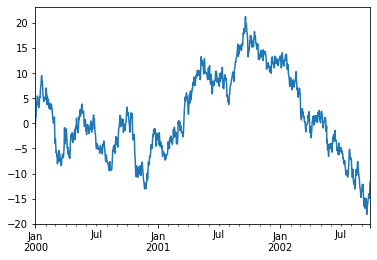

In [13]:
serie = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
serie = serie.cumsum()

serie.plot()

En el caso de tener un `DataFrame` el método `plot()` representará cada una de las columnas del `DataFrame`

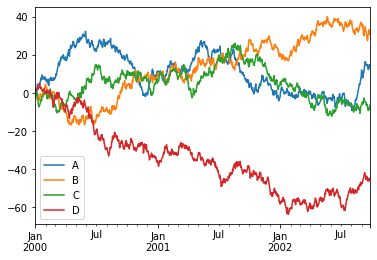

In [15]:
dataframe = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
dataframe = dataframe.cumsum()

dataframe.plot()

### 16.2. Diagrama de barras vertical

Hay más métodos de crear gráficos, como el diagrama de barras vertical mediante `plot.bar()`

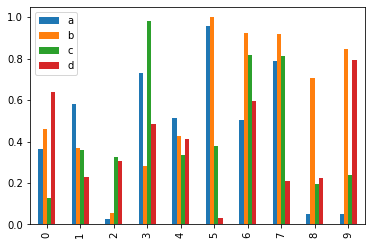

In [19]:
dataframe = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
dataframe.plot.bar()

Si queremos apilar las barras lo indicamos mediante la variable `stacked=True`

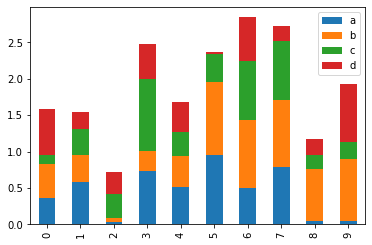

In [20]:
dataframe.plot.bar(stacked=True)

### 16.3. Diagrama de barras horizontal

Para crear un diagrama de barras horizontal usamos `plot.barh()`

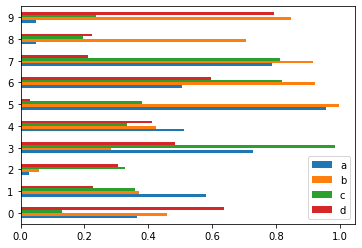

In [21]:
dataframe.plot.barh()

Si queremos apilar las barras lo indicamos mediante la variable `stacked=True`

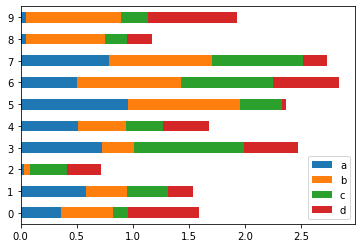

In [22]:
dataframe.plot.barh(stacked=True)

### 16.4. Histograma

Para crear un histograma usamos `plot.hist()`

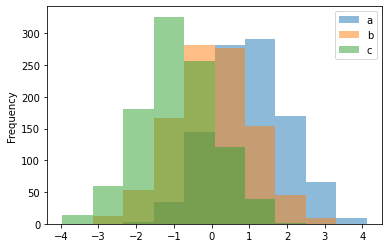

In [28]:
dataframe = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    }
)

dataframe.plot.hist(alpha=0.5)

Si queremos apilar las barras lo indicamos mediante la variable `stacked=True`

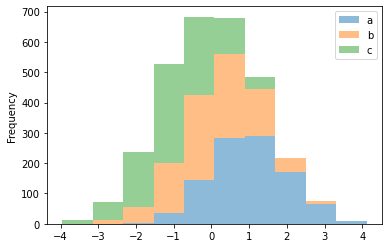

In [29]:
dataframe.plot.hist(alpha=0.5, stacked=True)

Si queremos añadir más columnas, es decir, si queremos que el histograma sea más informativo o preciso, lo indicamos mediante la variable `bins`

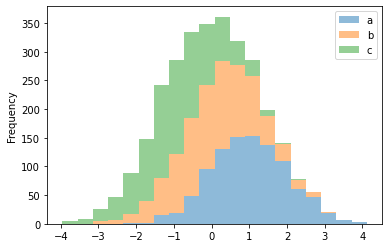

In [30]:
dataframe.plot.hist(alpha=0.5, stacked=True, bins=20)

### 16.5. Diagramas de velas

Para crear un diagrama de velas usamos `plot.box()`

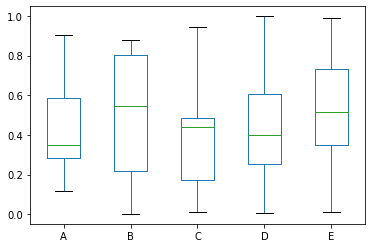

In [34]:
dataframe = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

dataframe.plot.box()

### 16.6. Gráficos de áreas

Para crear un gráfico de áreas usamos `plot.area()`

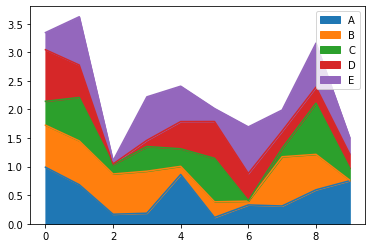

In [36]:
dataframe.plot.area()

### 16.7. Diagrama de dispersión

Para crear un diagrama de dispersión usamos `plot.scatter()`, donde hay que indicar las variables `x` e `y` del diagrama

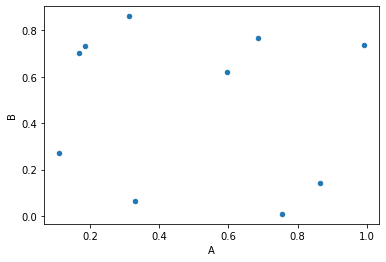

In [38]:
dataframe.plot.scatter(x='A', y='B')

### 16.8. Gráfico de contenedor hexagonal

Para crear un gráfico de contenedor hexagonal usamos `plot.hexbin()`, donde hay que indicar las variables `x` e `y` del diagrama y el tamaño de la malla mediante `gridsize`

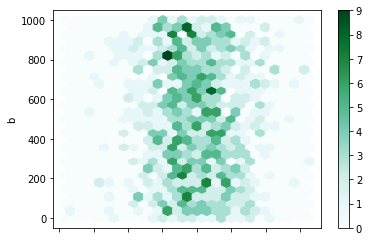

In [40]:
dataframe = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
dataframe["b"] = dataframe["b"] + np.arange(1000)

dataframe.plot.hexbin(x="a", y="b", gridsize=25)